<a href="https://colab.research.google.com/github/novay/amikom/blob/main/cv_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **A. Pendahuluan**

#### **1. Identitas Mahasiswa**<br/>
* Nama : Novianto Rahmadi (22.55.2293)
* Konsentrasi : Business Intelligence
* Tugas Ke : 3 (Tiga)
* Mata Kuliah : Computer Vision (CV)
* Dosen Pengampu : Dr. Arief Setyanto, S.Si., M.T.
* Tutor : Rizqi Sukma Kharisma, M.Kom.

#### **2. Persiapkan Citra**
Dalam laporan tugas ini saya menggunakan cara dengan mengunduh citra yang akan diolah secara acak menggunakan URL.

Penjelasan:
- Line 1: `import os` untuk menggunakan perintah dasar dari kernel, dalam hal ini adalah perintah `"wget"`
- Line 2: `from IPython.display import Image` salah satu *(built-in)* pustaka untuk menampilkan citra
- Line 4: Menentukan URL dari citra yang ingin diolah
- Line 5: Menjalankan perintah wget untuk mengunduh citra ke dalam **File Sessions** dari Google Colab
- Line 8: Untuk menampilkan citra asli yang sudah diunduh melalui **File Sessions**

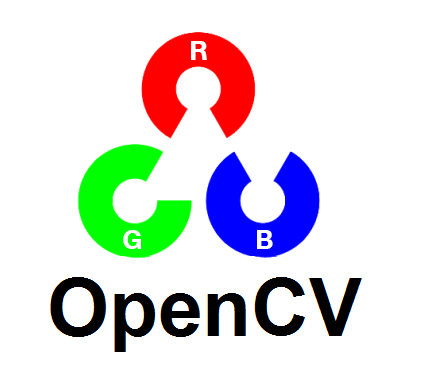

In [2]:
import os
from IPython.display import Image

image_url = 'https://btekno.id/img/opencv.png'
os.system('wget %s' %image_url)
filename = os.path.basename(image_url)

Image(filename)

#### **3. Library Yang Digunakan**
Berikut ini *library* (pustaka) python yang saya digunakan:<br/>
- **cv2** - dari OpenCV untuk manipulasi citra
- **numpy** - melakukan proses komputasi numerik
- **pandas** - untuk memanfaatkan fitur *dataframe*-nya
- **cv2_imshow** - Digunakan sebagai pengganti fungsi imshow dari OpenCV <br/>
  <small>Reason: https://stackoverflow.com/questions/65827830/disabledfunctionerror-cv2-imshow-is-disabled-in-colab-because-it-causes-jupy)</small>
- **pyplot** - dari Matplotlib untuk visualisasi

In [4]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

### **B. Library OpenCV**

**OpenCV** *(Open Source Computer Vision Library)* adalah sebuah pustaka khusus yang berfokus pada pengolahan citra secara digital.

#### **1. Menampilkan Citra**

Pada tahap ini merupakan langkah untuk menampilkan citra dengan menggunakan pustaka OpenCV, berikut penjelasannya:

**Line 1 :** `imread` adalah untuk membaca citra, dalam hal ini membaca file berdasarkan nama filenya setelah diunduh ke dalam *file sessions*.<br/>
**Line 2 :** `cv2_imshow` adalah pengganti fungsi `cv2.imshow` yang digunakan untuk menampilkan citra yang di baca menggunakan `imread`.

<small>Reason: https://stackoverflow.com/questions/65827830/disabledfunctionerror-cv2-imshow-is-disabled-in-colab-because-it-causes-jupy)</small>

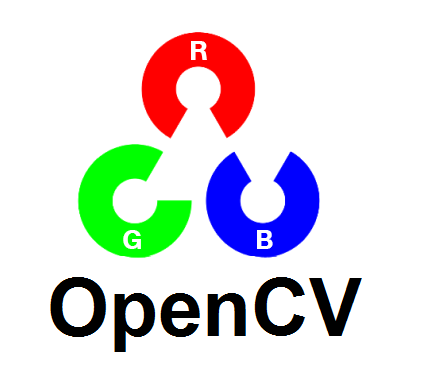

In [5]:
img = cv2.imread(filename)
cv2_imshow(img)

#### **2. Dimensi Citra**<br/>
Di OpenCV, fungsi `shape` biasanya digunakan untuk mendapatkan dimensi dari sebuah gambar atau array (array di sini dapat berupa gambar atau matriks numerik).

Lebih spesifik, fungsi `shape` mengembalikan sebuah respon yang berisi tiga numerik, secara terurut yaitu (tinggi, lebar, jumlah_channels) yang merepresentasikan dimensi dari gambar/array tersebut.

Dalam sytax berikut saya menampilkan 3 nilai tersebut menggunakan `dataframe` milik **pandas** agar lebih mudah di baca.

In [7]:
df = pd.DataFrame(img.shape, index = ["Height", "Width", "Number of Channels"], columns=["Nilai"])
display(df) 

,Nilai
Height,378
Width,428
Number of Channels,3


#### **3. Konversi Citra**

Sederhananya konversi citra merupakan bagian dari pengolahan citra, dimana citra hasil konversi nantinya dapat dipergunakan untuk analisis pengelompokan/identifikasi berdasarkan bentuk, warna atau tektur.

Pada contoh berikut, saya mencoba melakukan uji coba konversi citra ke jenis *Grayscale*, RGB dan HSV.

**Line 2-4:** `cv2.cvtColor` adalah fungsi untuk melakukan konversi, adapun argumen yang di minta adalah file citra dan jenis perwarnaannya.<br/>
**Line 6-8:** `resize` adalah fungsi untuk mengubah dimensi citra, saya menggunakan fungsi ini untuk menyeragamkan ukuran dari ketiga citra (412x189 piksels).<br/>
**Line 13:** `cv2.cvtColor` pemanggilan ini saya gunakan untuk mengubah *channels* dari citra *grayscale* agar bisa ditampilkan menggunakan fungsi `hconcat`.<br/>
**Line 15-16:** untuk menampilkan string (`print()`) beserta `cv2_imshow()` untuk menampilkan citra dan `cv2.hconcat()` untuk menampilkan beberapa citra secara horizontal.

[1] Grayscale; [2] RGB; [3] HSV



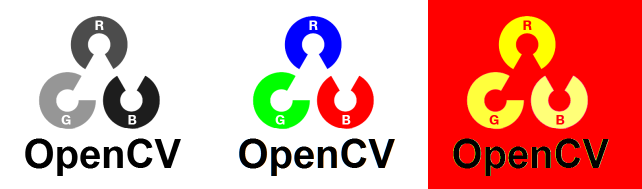

In [12]:
# Uji coba melakukan konversi ke jenis GRAY, RGB dan HSV
cGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cRgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cHsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

rcGray = cv2.resize(cGray, [214, 189])
rcRgb = cv2.resize(cRgb, [214, 189])
rcHsv = cv2.resize(cHsv, [214, 189])

# hconcat hanya bisa menampilkan gambar secara horizontal ketika semua citra memiliki dimensi yang sama
# Oleh karena itu, citra grayscale yang notabene merupakan citra 2 dimensi perlu menyesuaikan karakteristik citra 2 lainnya
# Untuk itu, perlu dilakukan konversi kembali ke BGR terlebih dahulu
ircGray = cv2.cvtColor(rcGray, cv2.COLOR_GRAY2BGR)

print("[1] Grayscale; [2] RGB; [3] HSV\n")
cv2_imshow(cv2.hconcat([ircGray, rcRgb, rcHsv]))

#### **4. Splitting Channel**<br/>
Splitting Channel pada OpenCV merupakan suatu teknik pemrosesan gambar yang digunakan untuk memisahkan setiap channel warna (atau *grayscale*) pada gambar menjadi gambar-gambar terpisah yang masing-masing merepresentasikan channel tersebut.

Secara umum, gambar berwarna (RGB) memiliki tiga channel warna, yaitu Red, Green, dan Blue. Dalam hal ini, *Splitting Channel* dapat dilakukan dengan menggunakan fungsi `cv2.split()` pada OpenCV. Fungsi `cv2.split()` akan memisahkan ketiga channel warna pada gambar RGB menjadi tiga gambar terpisah.

[1] Citra Asli


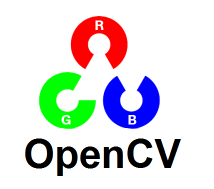



[2] Citra B G R


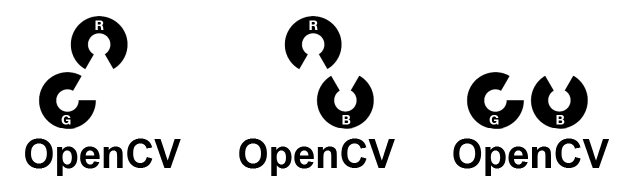



[3] Citra R G B


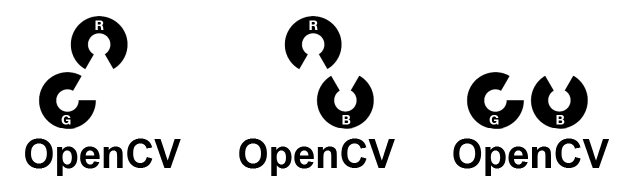

In [16]:
print('[1] Citra Asli')
resized_img = cv2.resize(img, [214, 189])
cv2_imshow(resized_img)

print('\n\n[2] Citra B G R')
B, G, R = cv2.split(img)
rB = cv2.resize(B, [214, 189])
rG = cv2.resize(G, [214, 189])
rR = cv2.resize(R, [214, 189])
cv2_imshow(cv2.hconcat([rB, rG, rR]))

print('\n\n[3] Citra R G B')
Rx, Gx, Bx = cv2.split(img)
xR = cv2.resize(Rx, [214, 189])
xG = cv2.resize(Gx, [214, 189])
xB = cv2.resize(Bx, [214, 189])
cv2_imshow(cv2.hconcat([xR, xG, xB]))

Berdasarkan output di atas, dapat ditarik kesimpulan bahwa fungsi split pada OpenCV memiliki susunan **BGR** dan **bukan RGB**.

Terlihat pada output **[2] Citra BGR**, channel dari citra yang hilang sesuai dengan warnanya, sementara ketika melakukan split menggunakan urutan **RGB**, warna yang hilang terlihat tidak sesuai dengan warnanya **[3] Citra RGB**.

#### **5. Merging Channel**<br/>
*Merging Channel* pada OpenCV merupakan kebalikan dari *Splitting Channel*, yaitu menggabungkan beberapa gambar (dalam hal ini masing-masing merepresentasikan channel warna) menjadi satu gambar dengan jumlah channel yang lebih banyak.

Dalam OpenCV, penggabungan gambar dapat dilakukan dengan menggunakan fungsi `cv2.merge()`. Fungsi `cv2.merge()` akan menggabungkan beberapa gambar yang diberikan menjadi satu gambar dengan jumlah channel yang sesuai.

RGB (Kiri) & BGR (Kanan)


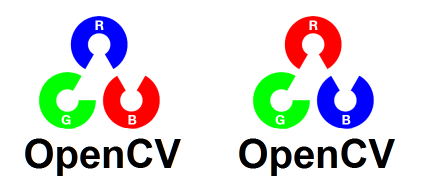

In [20]:
RGB = cv2.merge([R,G,B])
BGR = cv2.merge([B,G,R])

rRGB = cv2.resize(RGB, [214, 189])
rBGR = cv2.resize(BGR, [214, 189])

print("RGB (Kiri) & BGR (Kanan)")
cv2_imshow(cv2.hconcat([rRGB, rBGR]))

Dari output yang dihasilkan di atas, terlihat bahwa citra **RGB (Kiri)** tidak menampilkan urutan warna yang sesuai, sedangkan hasil merging citra **BGR (Kanan)** menampilkan warna sesuai dengan posisi aslinya.

Sehingga semakin kuat argumentasi terkait urutan channel dari output dari OpenCV yaitu **BGR**.

### **C. Library Matplotlib**<br/>
Matplotlib merupakan sebuah pustaka (library) pada bahasa pemrograman Python yang digunakan untuk membuat visualisasi data dalam bentuk grafik, plot, diagram, dan sebagainya. 

#### **1. Menampilkan Citra**<br/>
Mengikuti tugas yang diperintahkan, pustaka matplotlib dalam hal ini akan digunakan sebagai penyaji atau penampil citra.

Fungsi `imshow()` adalah sebuah fungsi yang disediakan oleh pustaka Matplotlib pada Python yang digunakan untuk menampilkan gambar dalam bentuk plot. Fungsi ini dapat digunakan untuk menampilkan gambar dalam berbagai format, seperti gambar dalam format JPEG, PNG, TIFF, atau format gambar lainnya.

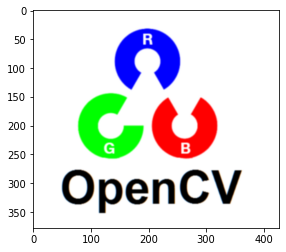

In [21]:
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.show()

#### **2. Menggunakan Figure**<br/>
**OOT (Out of Topic)** - Sekilas terkait penggunaan Figure dari Matplotlib.

Figure pada **Matplotlib** adalah sebuah container atau wadah yang digunakan untuk menampung semua elemen visual dalam sebuah plot, seperti gambar, sumbu (axis), teks, dan sebagainya.

Untuk lebih sederhana, Figure ini akan kita perlukan ketika ingin mensajikan banyak citra atau diagram sekaligus ke dalam bentuk matriks (baris dan kolom).

Untuk memudahkan pemamahaman, pada contoh berikut saya akan coba menampilkan 6 citra ke dalam 1 Figure, dan menyusun citranya dengan pola 3 kolom dan 2 baris,
sehingga sajian citranya akan menjadi 3x2.

Figure(1080x648)


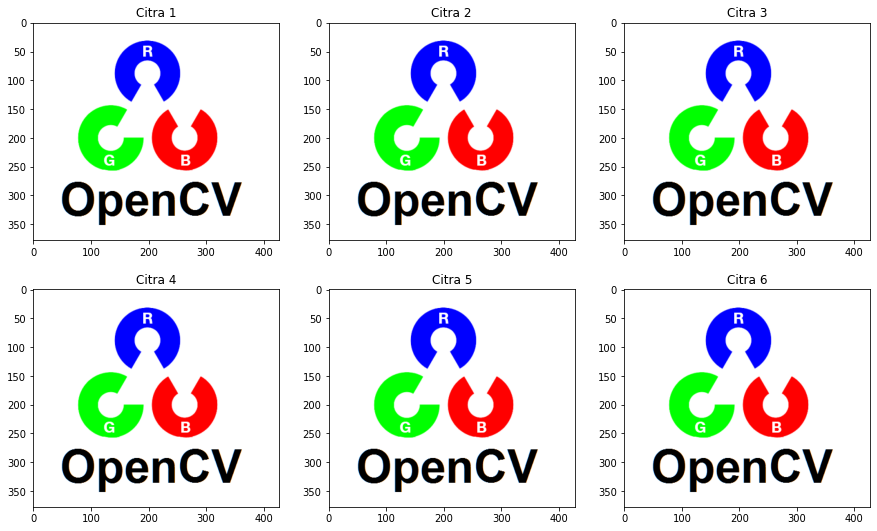

In [101]:
fig = plt.figure(figsize=(15, 9))

fig.add_subplot(2, 3, 1); plt.imshow(img); plt.title("Citra 1")
fig.add_subplot(2, 3, 2); plt.imshow(img); plt.title("Citra 2")
fig.add_subplot(2, 3, 3); plt.imshow(img); plt.title("Citra 3")
fig.add_subplot(2, 3, 4); plt.imshow(img); plt.title("Citra 4")
fig.add_subplot(2, 3, 5); plt.imshow(img); plt.title("Citra 5")
fig.add_subplot(2, 3, 6); plt.imshow(img); plt.title("Citra 6")

print(fig)

Penjelasan: <br/>
- `plt.figure()` untuk menginisiasi fungsi figure.
- `figsize=(15, 9)` argumen dalam fungsi `figure()` untuk melakukan kustomisasi ukuran dimana, argumen pertama **(15)** adalah jarak antar kolom dan argumen kedua **(9)** adalah jarak antar baris.
- `.add_subplot()` menerima 3 argumen masing-masing **(2)** merepresentasikan baris, **(3)** merepresentasikan kolom dan **(1-6)** merepresentasikan indeks item.

### **D. Perbedaan OpenCV & Matplotlib**<br/>
Pada bab ini, saya akan coba menjelaskan terkait perbedaan antara pustaka OpenCV dengan pustaka Matplotlib. Khususnya dalam sisi penyajian citranya. Dalam laporan ini, saya akan coba membandingkan output dari channel masing-masing pustaka dalam jenis RGB dan HSV kemudian ditutup dengan kesimpulan.

#### **1. Output RGB**<br/>
Output RGB adalah hasil keluaran (output) dari sebuah proses pengolahan citra atau grafik dalam bentuk kombinasi tiga warna primer yaitu merah (R), hijau (G), dan biru (B) yang membentuk sebuah gambar berwarna. 

Setiap pixel pada gambar RGB memiliki kombinasi intensitas warna merah, hijau, dan biru yang berbeda-beda. Warna yang dapat ditampilkan pada gambar RGB sangat beragam, karena setiap piksel dapat memiliki 256 level intensitas untuk masing-masing warna primer, sehingga terdapat 256^3 atau sekitar 16 juta kemungkinan warna yang dapat ditampilkan pada gambar RGB.

Figure(1080x504)


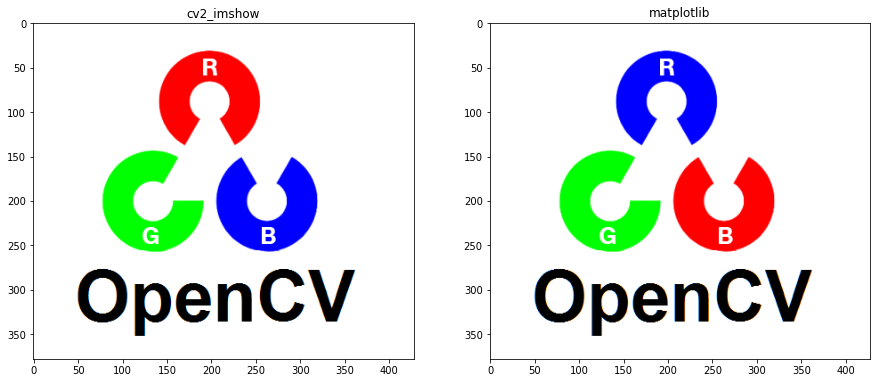

In [32]:
img_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Output is same as cv2.imshow()

fig = plt.figure(figsize=(15, 7))
fig.add_subplot(1, 2, 1); plt.imshow(img_cv2); plt.title("cv2_imshow")
fig.add_subplot(1, 2, 2); plt.imshow(img); plt.title("matplotlib")

print(fig)

Terlihat untuk output RGB kedua pustaka ini memiliki karakteristik atau urutan channel yang berbeda. Dimana, **OpenCV** akan menampilkan **citra asli (BGR)** sementara **Matplotlib** akan menampilkan citra yang secara default akan terkonversi menjadi **citra RGB**.

#### **2. Output HSV**<br/>
Output HSV adalah hasil keluaran (output) dari sebuah proses pengolahan citra atau grafik dalam bentuk kombinasi tiga parameter yaitu Hue (H), Saturation (S), dan Value (V) yang membentuk sebuah gambar dalam model warna HSV (Hue, Saturation, Value). Model warna HSV lebih intuitif daripada model warna RGB, karena mewakili warna seperti yang dilihat oleh mata manusia.

*   Hue (H) merepresentasikan jenis warna, seperti merah, hijau, biru, kuning, dan sebagainya. Hue dapat memiliki nilai dalam rentang 0-360 derajat, yang mewakili rentang warna pada lingkaran warna.
*   Saturation (S) merepresentasikan kecerahan atau kejenuhan warna, dengan nilai 0-100%. Nilai S = 0 berarti warna adalah keabu-abuan, sedangkan nilai S = 100% berarti warna penuh.
*   Value (V) merepresentasikan kecerahan atau intensitas warna, dengan nilai 0-100%. Nilai V = 0 berarti warna hitam, sedangkan nilai V = 100% berarti warna penuh.





Format HSV menggunakan OpenCV



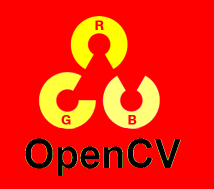


Format HSV menggunakan Matplotlib


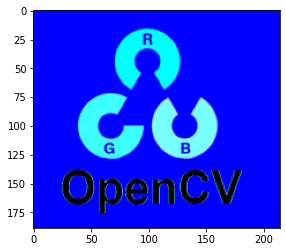

In [104]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rHsv = cv2.resize(hsv, [214, 189])

print("Format HSV menggunakan OpenCV\n")
cv2_imshow(rHsv)

print("\nFormat HSV menggunakan Matplotlib")
plt.imshow(rHsv);

Konversi citra menjadi HSV pada OpenCV dan Matplotlib juga memiliki perbedaan dimana OpenCV lebih mengedepankan channel R (Merah) sementara Matplotlib menggunakan chanel B (Biru).

HSV menggunakan OpenCV



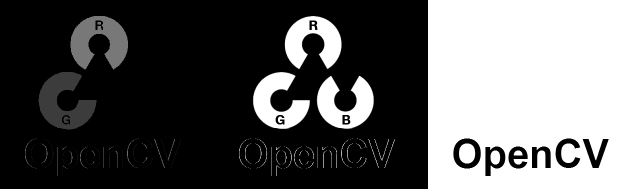



HSV menggunakan Matplotlib
Figure(1080x504)


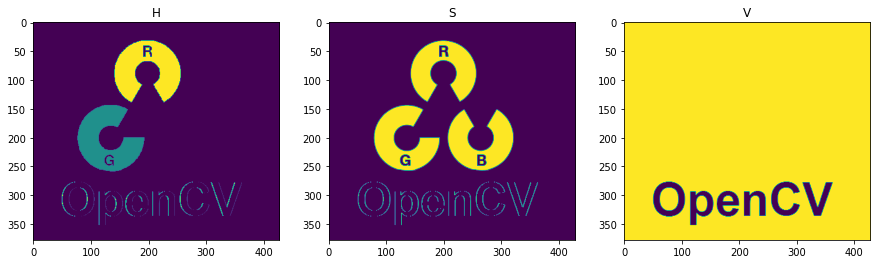

In [85]:
H, S, V = cv2.split(hsv)
print("HSV menggunakan OpenCV\n")
rH = cv2.resize(H, [214, 189])
rS = cv2.resize(S, [214, 189])
rV = cv2.resize(V, [214, 189])
cv2_imshow(cv2.hconcat([rH, rS, rV]))

print("\n\nHSV menggunakan Matplotlib")
fig = plt.figure(figsize=(15, 7))
fig.add_subplot(1, 3, 1); plt.imshow(H); plt.title("H")
fig.add_subplot(1, 3, 2); plt.imshow(S); plt.title("S")
fig.add_subplot(1, 3, 3); plt.imshow(V); plt.title("V")

print(fig)

Merge HSV ke BGR menggunakan OpenCV


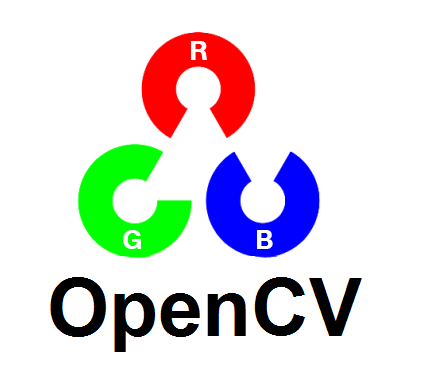

Merge HSV ke RGB menggunakan Matplotlib
Figure(1080x504)


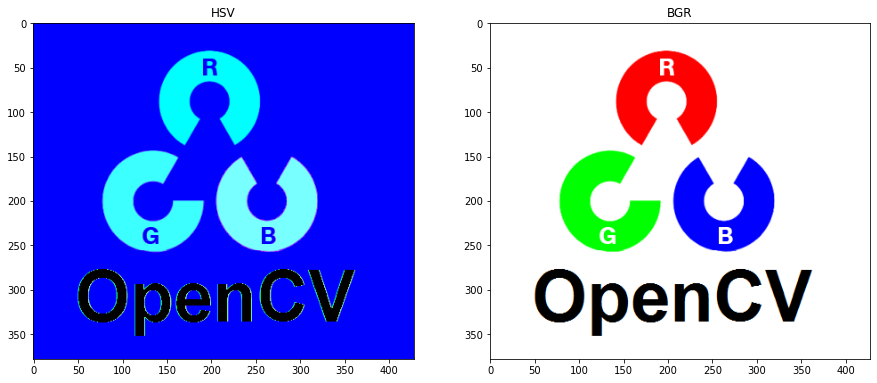

In [118]:
mHsv = cv2.merge([H,S,V])

print("Merge HSV ke BGR menggunakan OpenCV")
cmHsv = cv2.cvtColor(mHsv, cv2.COLOR_HSV2BGR)
cv2_imshow(cmHsv)

print("Merge HSV ke RGB menggunakan Matplotlib")
cmHsvRgb = cv2.cvtColor(mHsv, cv2.COLOR_HSV2RGB)
fig = plt.figure(figsize=(15, 7))
fig.add_subplot(1, 2, 1); plt.imshow(mHsv); plt.title("HSV")
fig.add_subplot(1, 2, 2); plt.imshow(cmHsvRgb); plt.title("BGR")

print(fig)

Dari hasil penggabungan diatas, terlihat bahwa **format HSV** akan mengembalikan ke citra yang dihasilkan **Matplotlib** sebelumnya sementara ketika dikonveris menjadi **format BGR** citra akan dikonversi menjadi citra aslinya.

Catatan:<br/>
- Pada output citra asli yang dihasilkan oleh OpenCV akan kembali ke citra semula ketika citra penggabungan **HSV** dikonversi ke **BGR**.
- Sementara output dari Matplotlib, agar dapat mengembalikan ke citra aslinya, konversi HSV harus dilakukan menggunakan `COLOR_HSV2RGB` karena urutan channel pada Matplotlib adalah **RGB**.

#### **3. Kesimpulan**<br/>
Kesimpulannya, terdapat beberapa perbedaan antara `imshow` pada **OpenCV** dan `imshow` pada **Matplotlib**. Perbedaan tersebut adalah:

*   **Format Gambar:**<br/>OpenCV menggunakan format BGR (Blue, Green, Red) pada gambar, sedangkan Matplotlib menggunakan format RGB (Red, Green, Blue).
*   **Tipe Data:**<br/>OpenCV dapat menampilkan gambar dengan tipe data uint8 dan float32, sedangkan Matplotlib dapat menampilkan gambar dengan tipe data apapun.
*   **Performa:**<br/>OpenCV lebih cepat dalam menampilkan gambar dibandingkan dengan Matplotlib.

Dalam konteks pemrosesan citra, **OpenCV** lebih cocok digunakan karena mampu menampilkan gambar dengan cepat. Namun, jika digunakan dalam konteks visualisasi data, **Matplotlib** dapat memberikan fleksibilitas yang lebih besar dalam menampilkan gambar dengan tipe data yang beragam dan mendukung tampilan yang lebih interaktif.




### **E. Penutup**<br/>
Demikian laporan tugas saya perihal topik **Color Scape** yang dilakukan pada pertemuan minggu ke-5.
<br/><br/>
Salah hormat,<br/>
**Novianto Rahmadi (22.55.2293)**